In [8]:
import tweepy   
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as pt

In [ ]:
#TextBlob
'''TextBlob is a Python  library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) 
tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.'''


#Tweepy
'''
Tweepy is a Python wrapper for the Twitter API. It accesses the Twitter REST (including Search) and Stream APIs'''

#Pandas
'''pandas is a software library written for the Python programming language for data manipulation and analysis.It is used here for 
cretaion of the dataframe'''

#Numpy
'''NumPy is a Python library used for working with arrays. 
It also has functions for working in domain of linear algebra, fourier transform, and matrices'''


#re
'''A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given
regular expression (or if a given regular expression matches a
particular string, which comes down to the same thing).'''


#Matplotlib.pyplot
'''Used for the plotting of the graph'''

In [9]:
configure=pd.read_csv("C:\\Users\\SHAGUN\\OneDrive\\Desktop\\twitter\\configure.csv")  #Loading the Keys of the Twitter Developer Account that are stored as csv file
#Tweepy is the python library that give the access to the Twitter Live Data Set. 
#These keys are generated through the Twitter developer Account

In [10]:
twitterApiKey = configure['twitterApiKey'][0]
twitterApiSecret = configure['twitterApiSecret'][0]
twitterApiAccessToken=configure['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret=configure['twitterApiAccessTokenSecret'][0]
#these are the keys that give the access to the Twitter Live Data Set 

In [11]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [12]:
#taking the input of the twitter id by the user for the analysis
twitterAccount=input('Enter Twitter account to be analized: ')
print(twitterAccount)

Enter Twitter account to be analized: thekiranbedi
thekiranbedi


In [13]:
#validating the user account details
tweets = tweepy.Cursor(twitterApi.user_timeline,
                      screen_name=twitterAccount,
                      count = None,
                      since_id = None,
                      max_id = None,trim_user = True,exclude_replies = True,contributor_details=False,
                      include_entities = False).items(50);

In [14]:
#making of the dataframe of the tweets of the twiter user
df = pd.DataFrame(data = [tweet.text for tweet in tweets],columns=['Tweet'])

Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities
Unexpected parameter: contributor_details
Unexpected parameter: include_entities


In [15]:
df.head()    #printing of the top 5 tweets of the twitter user 

,Tweet
0,Good #MorningNutrition https://t.co/3sQq0RTuYy
1,RT @ANI: ANI Podcast with Smita Prakash | EP-1...
2,Today I believe is #NCC day. \nMy Fond Memorie...
3,The week that was in our Urban Projects of @Na...
4,The fortnight that was at our @IVFoundation @D...


In [16]:
def cleaning_data(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt
#The data is being cleaned over here and all the regular expressions are being removed for the clear analysis of the data

In [17]:
df['Tweet']=df['Tweet'].apply(cleaning_data)

In [ ]:
#The sentiment function of textblob returns two properties, polarity, and subjectivity.

# Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
# Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information

In [18]:
def get_text(txt):
    return TextBlob(txt).sentiment.subjectivity

In [19]:
def get_text_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [20]:
df['Subjectivity']=df['Tweet'].apply(get_text)
df['Polarity']=df['Tweet'].apply(get_text_polarity)

In [21]:
df.head(50)    #displaying top 50 tweets from the dataset

,Tweet,Subjectivity,Polarity
0,Good MorningNutrition,0.600000,0.700000
1,ANI Podcast with Smita Prakash | EP-19 | Ex-IP...,0.400000,0.000000
2,Today I believe is NCC day. \nMy Fond Memories...,0.000000,0.000000
3,The week that was in our Urban Projects of,0.000000,0.000000
4,The fortnight that was at our,0.000000,0.000000
5,The week that was on our Rural Project,0.000000,0.000000
6,"Good MorningNutrition \nOn Time, how precious ...",0.800000,0.600000
7,Celebrating the bond of a mother and daughter ...,0.000000,0.000000
8,,0.000000,0.000000
9,"The , the first IIT in India was started from ...",0.333333,0.250000


In [22]:
df=df.drop(df[df['Tweet']==''].index)

In [23]:
def textAnalysis(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'
#Function to determine whether data is positive,negative and neutral on the basis of polarity and subjectivity

In [24]:
df['Type_of_Tweet']=df['Polarity'].apply(textAnalysis)

In [25]:
df.head(50)     #displaying top 50 tweets from the dataset

,Tweet,Subjectivity,Polarity,Type_of_Tweet
0,Good MorningNutrition,0.600000,0.700000,Positive
1,ANI Podcast with Smita Prakash | EP-19 | Ex-IP...,0.400000,0.000000,Neutral
2,Today I believe is NCC day. \nMy Fond Memories...,0.000000,0.000000,Neutral
3,The week that was in our Urban Projects of,0.000000,0.000000,Neutral
4,The fortnight that was at our,0.000000,0.000000,Neutral
5,The week that was on our Rural Project,0.000000,0.000000,Neutral
6,"Good MorningNutrition \nOn Time, how precious ...",0.800000,0.600000,Positive
7,Celebrating the bond of a mother and daughter ...,0.000000,0.000000,Neutral
9,"The , the first IIT in India was started from ...",0.333333,0.250000,Positive
10,From at the Partho Ghosh Academy of Leadershi...,0.000000,0.000000,Neutral


In [26]:
#determining the positive tweets
positive=df[df['Type_of_Tweet']=='Positive']
print(str(positive.shape[0]/(df.shape[0])*100)+'% of positive Tweets')
pos=positive.shape[0]/df.shape[0]*100

53.06122448979592% of positive Tweets


In [27]:
#determining the negative tweets
negative=df[df['Type_of_Tweet']=='Negative']
print(str(negative.shape[0]/(df.shape[0])*100)+'% of Negative Tweets')
neg=negative.shape[0]/df.shape[0]*100

0.0% of Negative Tweets


In [28]:
#determining the neutral tweets
neutral=df[df['Type_of_Tweet']=='Neutral']
print(str(neutral.shape[0]/(df.shape[0])*100)+'% of Neutral Tweets')
neu=neutral.shape[0]/df.shape[0]*100

46.93877551020408% of Neutral Tweets


In [29]:
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neu]
colors=['yellow','aqua','orange']

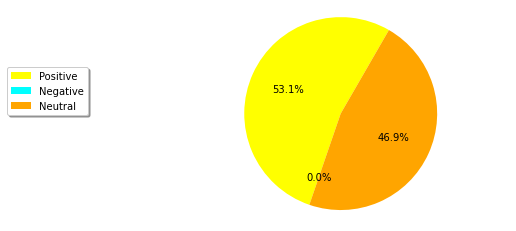

In [30]:
pt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=60)
pt.legend(labels,loc=(-0.5,0.5),shadow=True)
pt.axis('equal')
pt.savefig('Tweet_Analyzer.png')

<BarContainer object of 2 artists>

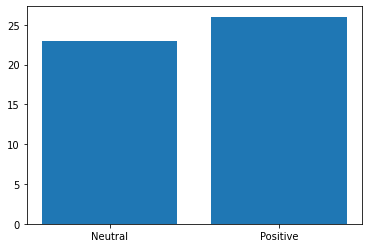

In [33]:
labels=df.groupby('Type_of_Tweet').count().index.values
values=df.groupby('Type_of_Tweet').size().values
pt.bar(labels,values)

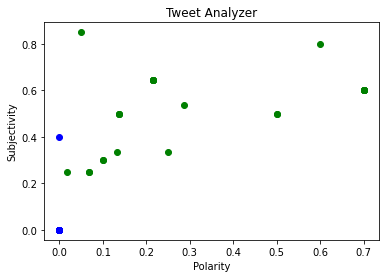

In [36]:
for index,row in df.iterrows():
    if row['Type_of_Tweet']=='Positive':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Type_of_Tweet']=='Negative':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Type_of_Tweet']=='Neutral':
        pt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
pt.title('Tweet Analyzer')
pt.xlabel('Polarity')
pt.ylabel('Subjectivity')
pt.show()
        